Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.
import folium
import json

In [3]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [4]:
%matplotlib inline

In [5]:
#import DF
df_list = pd.read_csv(r"C:\Users\18179\Documents\CareerFoundry\Independent Project\02 Data\Raw Data\Listings.csv\Listings.csv", index_col = False)

C:\Users\18179\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (5,13) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [6]:
#Import JSON

country_geo = r"C:\Users\18179\Documents\CareerFoundry\Independent Project\02 Data\Raw Data\custom.geo.json"

Clean & wrangle Geo and listing files

In [7]:
df_list['city'].value_counts()

Paris             64690
New York          37012
Sydney            33630
Rome              27647
Rio de Janeiro    26615
Istanbul          24519
Mexico City       20065
Bangkok           19361
Cape Town         19086
Hong Kong          7087
Name: city, dtype: int64

In [8]:
#Create country column

df_list.loc[df_list['city'] == 'Paris', 'country'] = 'France'
df_list.loc[df_list['city'] == 'New York', 'country'] = 'United States of America'
df_list.loc[df_list['city'] == 'Sydney', 'country'] = 'Australia'
df_list.loc[df_list['city'] == 'Rome', 'country'] = 'Italy'
df_list.loc[df_list['city'] == 'Rio de Janeiro', 'country'] = 'Brazil'
df_list.loc[df_list['city'] == 'Istanbul', 'country'] = 'Turkey'
df_list.loc[df_list['city'] == 'Mexico City', 'country'] = 'Mexico'
df_list.loc[df_list['city'] == 'Bangkok', 'country'] = 'Thailand'
df_list.loc[df_list['city'] == 'Cape Town', 'country'] = 'South Africa'
df_list.loc[df_list['city'] == 'Hong Kong', 'country'] = 'China'

In [42]:
#Select necessary columns

columns = ['price',
           'host_total_listings_count',
           'review_scores_rating',
           'review_scores_accuracy',
           'review_scores_cleanliness',
           'review_scores_checkin',
           'review_scores_location',
           'review_scores_value',
           'accommodates',
           'latitude',
           'longitude',
          ]

In [43]:
#create subset

City_rev = df_list[columns]

In [44]:
City_rev.isnull().sum()

price                            0
host_total_listings_count      165
review_scores_rating         91405
review_scores_accuracy       91713
review_scores_cleanliness    91665
review_scores_checkin        91771
review_scores_location       91775
review_scores_value          91785
accommodates                     0
latitude                         0
longitude                        0
dtype: int64

In [45]:
#impute missing values

City_rev['host_total_listings_count'].fillna(City_rev['host_total_listings_count'].median(), inplace = True)
City_rev['review_scores_rating'].fillna(City_rev['review_scores_rating'].median(), inplace = True)
City_rev['review_scores_accuracy'].fillna(City_rev['review_scores_accuracy'].median(), inplace = True)
City_rev['review_scores_cleanliness'].fillna(City_rev['review_scores_cleanliness'].median(), inplace = True)
City_rev['review_scores_checkin'].fillna(City_rev['review_scores_checkin'].median(), inplace = True)
City_rev['review_scores_location'].fillna(City_rev['review_scores_location'].median(), inplace = True)
City_rev['review_scores_value'].fillna(City_rev['review_scores_value'].median(), inplace = True)

C:\Users\18179\anaconda3\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [46]:
#Clean extreme values

City_rev = City_rev[City_rev['price'] < 1000]

Elbow Technique

In [47]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [48]:
#create score that represents a rate of variation for cluster operation
score = [kmeans[i].fit(City_rev).score(City_rev) for i in range(len(kmeans))] 

score

[-31104305610.38614,
 -15579109304.708889,
 -6191217405.18162,
 -4577295372.264468,
 -3310904825.21424,
 -2543429173.9352303,
 -2039678891.5089881,
 -1797722265.7499707,
 -1568667734.9672356]

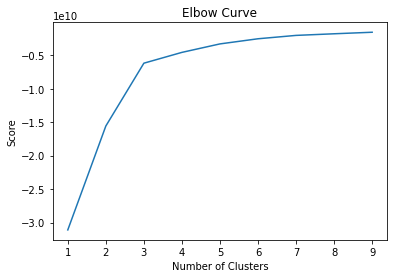

In [49]:
#plot elbow curve using pylab

pl.plot(num_cl, score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

In [50]:
#create k-means object
kmeans = KMeans(n_clusters = 4, n_jobs = -1)

In [51]:
#Fit kmeans to df
kmeans.fit(City_rev)

C:\Users\18179\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=4, n_jobs=-1)

In [52]:
City_rev['clusters'] = kmeans.fit_predict(City_rev)

C:\Users\18179\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


In [53]:
City_rev['clusters'].value_counts()

1    169344
3     49387
0     25737
2       298
Name: clusters, dtype: int64

In [54]:
#Descriptive Statistics 

City_rev.loc[City_rev['clusters'] == 2, 'cluster'] = 'purple'
City_rev.loc[City_rev['clusters'] == 1, 'cluster'] = 'pink'
City_rev.loc[City_rev['clusters'] == 0, 'cluster'] = 'tan'
City_rev.loc[City_rev['clusters'] == 3, 'cluster'] = 'dark purple'

Combine data frames

In [72]:
column = ['city',
            'country',
         'price']

In [73]:
location = df_list[column]

In [74]:
location.head()

,city,country,price
0,Paris,France,53
1,Paris,France,120
2,Paris,France,89
3,Paris,France,58
4,Paris,France,60


In [78]:
#combine DFs

Joined = City_rev.join(location, lsuffix = '_left')

In [79]:
Joined.head()

,price_left,host_total_listings_count,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_location,review_scores_value,accommodates,latitude,longitude,clusters,cluster,city,country,price
0,53,1.0,100.0,10.0,10.0,10.0,10.0,10.0,2,48.88668,2.33343,1,pink,Paris,France,53
1,120,1.0,100.0,10.0,10.0,10.0,10.0,10.0,2,48.88617,2.34515,1,pink,Paris,France,120
2,89,1.0,100.0,10.0,10.0,10.0,10.0,10.0,2,48.88112,2.31712,1,pink,Paris,France,89
3,58,1.0,100.0,10.0,10.0,10.0,10.0,10.0,2,48.84571,2.30584,1,pink,Paris,France,58
4,60,1.0,100.0,10.0,10.0,10.0,10.0,10.0,2,48.85500,2.26979,1,pink,Paris,France,60


In [70]:
City_rev_location.head()

,price,host_total_listings_count,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_location,review_scores_value,accommodates,latitude,longitude,clusters,cluster,city,country
0,53.0,1.0,100.0,10.0,10.0,10.0,10.0,10.0,2.0,48.88668,2.33343,1.0,pink,NaN,NaN
1,120.0,1.0,100.0,10.0,10.0,10.0,10.0,10.0,2.0,48.88617,2.34515,1.0,pink,NaN,NaN
2,89.0,1.0,100.0,10.0,10.0,10.0,10.0,10.0,2.0,48.88112,2.31712,1.0,pink,NaN,NaN
3,58.0,1.0,100.0,10.0,10.0,10.0,10.0,10.0,2.0,48.84571,2.30584,1.0,pink,NaN,NaN
4,60.0,1.0,100.0,10.0,10.0,10.0,10.0,10.0,2.0,48.85500,2.26979,1.0,pink,NaN,NaN


In [57]:
City_rev.head()

,price,host_total_listings_count,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_location,review_scores_value,accommodates,latitude,longitude,clusters,cluster
0,53,1.0,100.0,10.0,10.0,10.0,10.0,10.0,2,48.88668,2.33343,1,pink
1,120,1.0,100.0,10.0,10.0,10.0,10.0,10.0,2,48.88617,2.34515,1,pink
2,89,1.0,100.0,10.0,10.0,10.0,10.0,10.0,2,48.88112,2.31712,1,pink
3,58,1.0,100.0,10.0,10.0,10.0,10.0,10.0,2,48.84571,2.30584,1,pink
4,60,1.0,100.0,10.0,10.0,10.0,10.0,10.0,2,48.85500,2.26979,1,pink


In [18]:
#save as JSON file

City_rev.to_json(r'C:\Users\18179\Documents\CareerFoundry\Independent Project\02 Data\Raw Data\Airbnb.geo.json') 

In [20]:
#save as csv file

City_rev.to_csv(r'C:\Users\18179\Documents\CareerFoundry\Independent Project\02 Data\Raw Data\Airbnb.csv') 

In [22]:
#excel file
with pd.ExcelWriter('mult_sheets_1.xlsx') as writer1:
    City_rev.to_excel(writer1, sheet_name = 'City_rev', index = False)

In [80]:
#excel file

Joined.to_excel(r'C:\Users\18179\Documents\CareerFoundry\Independent Project\02 Data\Raw Data\Airbnb_join.xlsx') 